In [17]:
import matplotlib.pyplot as plt
import numpy as np


# Env

In [6]:
class ENV:
    ORIGIN = 3

    def __init__(self, size, terminal={}, default_reward = 0):
        self.size = size # n 
        self.terminal = terminal
        self.default_reward = default_reward

    # returning the next state based on a given action and current state.
    # input action = horizontal_move
    def next_state(self, current_state, action):
        # define next state
        next = current_state+action
        # check validity and accessibility of the next state
        if self.is_valid(next):
            return next, self.get_reward(next), self.is_terminal(next)
        return False
    
    # returning the reward for an state.
    def get_reward(self, state):
        # check validity and accessibility of the state
        if self.is_valid(state):        
            if state in self.terminal.keys():
                return self.terminal[state]
            else:
                return self.default_reward
        return False

    # for a state, determins with action in a list of moves is possible
    def possible_actions(self, state, moves):
        # keys=possible actions, values=next state with that action
        actions = []
        for move in moves:
            next_state = self.next_state(state, move)
            if next_state:
                actions.append(move)
        return actions

    # check if a state is in the grid limits
    def is_valid(self, state):
        if 0 <= state < self.size:
            return True
        return False

    # check if a state is a terminal
    def is_terminal(self, state):
        if state in self.terminal:
            return True
        return False

    # returns all states in the GridWorld
    def get_states(self):
        return [x for x in range(self.size)]

    def get_origin(self):
        return ENV.ORIGIN


size = 7
terminal_states = {0: 0, 6: 1}
env = ENV(size, terminal_states)

# TD_0

In [35]:
class TD_Agent:

  def __init__(self, env):
    self.env = env
    self.current_state = self.env.get_origin()
    self.possible_moves = [1, -1] # one cell to right, left

  def generate_episode(self):
    done = False
    episodes = []
    while not done:
      action = np.random.choice(self.env.possible_actions(self.current_state, self.possible_moves))
      next_state, reward, done = self.env.next_state(self.current_state, action)
      episodes.append((self.current_state, next_state, action, reward, done))
      self.current_state = next_state
    return episodes
    
  def td_0(self, episode_n, gamma, alpha=0.1):
    #initialize
    V = np.full(self.env.size, 0.5)
    returns = {}
    V_hist = np.zeros((episode_n, self.env.size))

    for i in range(episode_n):
        episodes = self.generate_episode()
        for t in range(len(episodes)):
            state, next_state, action, reward, done = episodes[t]
            if done:
              V[state] = V[state] + alpha * (reward + gamma * 0 - V[state])
            else:
              V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])
      
        V_hist[i,:] = V.copy()
    
    return V_hist, V


TD = TD_Agent(env)
td_V_hist, td_V = TD.td_0(1000, 0.99)

In [36]:
td_V

array([0.10893551, 0.08573011, 0.20982183, 0.37619142, 0.53976186,
       0.72990354, 0.8098965 ])

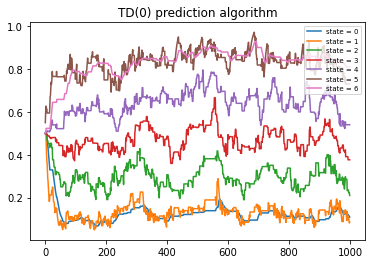

In [37]:
for i in range(env.size):
  plt.plot(td_V_hist[:,i], label = f"state = {i}")
plt.legend(loc=1, fontsize = 'x-small')
plt.title("TD(0) prediction algorithm")
plt.show()

## Monte Carlo

In [38]:
class MC_Agent:

  def __init__(self, env):
    self.env = env
    self.current_state = self.env.get_origin()
    self.possible_moves = [1, -1] # one cell to right, left

  def generate_episode(self):
    done = False
    episodes = []
    while not done:
      action = np.random.choice(self.env.possible_actions(self.current_state, self.possible_moves))
      next_state, reward, done = self.env.next_state(self.current_state, action)
      episodes.append((self.current_state, action, reward))
      self.current_state = next_state
    return episodes

  def every_visit_mc(self, episode_n, gamma):
    #initialize
    V = np.full(self.env.size, 0.5)
    returns = {}
    V_hist = np.zeros((episode_n, self.env.size))
    
    for i in range(episode_n):
      episodes = self.generate_episode()
      G = 0
      for t in range(len(episodes))[::-1]:
        state, action, reward = episodes[t]
        G = gamma * G + reward
        if state in returns:
          returns[state].append(G)
        else:
          returns[state] = [G]
        V[state] = np.average(returns[state])
      

      V_hist[i,:] = V.copy()

    return V_hist, V


MC = MC_Agent(env)
mc_V_hist, mc_V = MC.every_visit_mc(1000, 0.97)


In [39]:
mc_V

array([0.09810519, 0.09690546, 0.21008715, 0.3783883 , 0.58300825,
       0.79653611, 0.7731671 ])

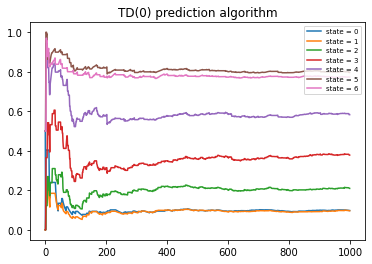

In [40]:
for i in range(env.size):
  plt.plot(mc_V_hist[:,i], label = f"state = {i}")
plt.legend(loc=1, fontsize = 'x-small')
plt.title("TD(0) prediction algorithm")
plt.show()